# Atomic Orbitals
### Christina Lee
### Prerequisites: Quantum Mechanics

Electrons around a nucleus.  Do they look like little well behaved planets orbiting a sun?  

NOPE!

We get spread out blobs in special little patterns called orbitals.  Here, we will look at their shapes and properties a bit.  Today we will look at graphs in 1D and 2D, but next week use a fancy, but slightly unstable plotting package, GLVisualize to generate some 3D plots.  

The Hamiltonian for our problem is:

\begin{equation}
{\cal H}\Psi(x) =\left[ -\frac{\hbar}{2 m} \nabla^2 - \frac{Z e^2}{4 \pi \epsilon_0 r}\right]\Psi(x) = E \Psi(x)
\end{equation}
with
\begin{equation}
\nabla^2= \frac{1}{r^2}\frac{\partial}{\partial r} \left(
r^2 \frac{\partial}{\partial r}
\right)+ 
\frac{1}{r^2 \sin \theta} \frac{\partial}{\partial \theta} \left(
\sin \theta \frac{\partial}{\partial \theta}
\right)+
\frac{1}{r^2 \sin^2 \theta} \frac{\partial^2}{\partial \phi^2}
\end{equation}

To solve this problem, we begin by guessing a solution with seperated Radial and Angular variables,
\begin{equation}
\Psi(x) = R(r) \Theta ( \theta,\phi)
\end{equation}

\begin{equation}
\frac{E r^2 R(r)}{2r R^{\prime}(r) + r^2 R^{\prime \prime}(r)}=
\frac{\left( \frac{1}{\sin \theta} \frac{\partial}{\partial \theta} \left(
\sin \theta \frac{\partial \Theta(\theta,\phi)}{\partial \theta}
\right)+
\frac{1}{\sin^2 \theta} \frac{\partial^2 \Theta(\theta,\phi)}{\partial \phi^2}\right)      }{\Theta( \theta, \phi)}
=C
\end{equation} 

Instead of going into the precise mechanisms of solving those two seperate equations here, trust for now that they follow standard special functions, the associated Legendre Polynomial and the generalized Laguerre Polynomial.  Try a standard Quantum Mechanics textbook for more information about this.

The overall eigenstate is given by
\begin{equation}
\Psi(\vec{x})= N R^{n,l}(\rho (r) )  Y^m_l (\theta,\phi)
\end{equation}

The angular solution is:
\begin{equation}
        Y^m_l(θ,ϕ) = (-1)^m e^{i m \phi} P^m_l (\cos(θ))
\end{equation}
where $P^m_l (\cos (\theta))$ is the associated Legendre Polynomial.
And the radial solution is:
\begin{equation}
    R^{n,l} (\rho) = \rho^l e^{-\rho/2} L^{2 l+1}_{n-l-1} (\rho)
\end{equation}
where $L^{2 l+1}_{n-l-1}(\rho)$ is the generalized Laguerre polynomial.  
Instead of $r$, we deal with $\rho$, a scaled function of $r$:
\begin{equation}
    \rho=\frac{2r}{n a_0}
\end{equation}
Everything is normalized by:
\begin{equation}
    N=\sqrt{\left(\frac{2}{n}\right)^3 \frac{(n-l-1)}{2n(n+l)!}}
\end{equation}



In [1]:
using Pkg
Pkg.add("GSL");
#Pkg.add("PyPlot");
using GSL;    #GSL holds the special functions
using Plots;
gr()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
 Installed GSL ─ v0.5.0
  Updating `~/.julia/environments/v1.0/Project.toml`
  [92c85e6c] + GSL v0.5.0
  Updating `~/.julia/environments/v1.0/Manifest.toml`
  [92c85e6c] + GSL v0.5.0
  Building GSL → `~/.julia/packages/GSL/PPlN5/deps/build.log`


┌ Info: Precompiling GSL [92c85e6c-cbff-5e0c-80f7-495c94daaecd]
└ @ Base loading.jl:1189


Plots.GRBackend()

#### Cell to Evaluate
What's below is a bunch of definitions that makes our calculations easier later on.  Here I utalize the Gnu scientific library, GSL imported above, to calculate the special functions.  

#### <b>Programming Tip!</b>
Even though its not necessary, specifying the type of inputs to a function through `m::Int` helps prevent improper inputs and allows the compiler to perform additional optimizations.  Julia also implements <i>Abstract Types</i>, so we don't have to specify the exact type of Int.  Real allows and numerical, non-complex type.  

Type greek characters in Jupyter notebooks via LaTeX syntax.  ex: \alpha+tab

The function `Orbital` throws `DomainError()` when `l` or `m` do not obey their bounds.  Julia supports a wide variety of easy to use error messages.

In [17]:
a0=1; #for convenience, or 5.2917721092(17)×10−11 m

# The unitless radial coordinate
ρ(r,n)=2r/(n*a0);

#The θ dependence
function Pmlh(m::Int,l::Int,θ::Real)
    return (-1.0)^m *sf_legendre_Plm(l,m,cos(θ)); 
end

#The θ and ϕ dependence
function Yml(m::Int,l::Int,θ::Real,ϕ::Real)
    return  (-1.0)^m*sf_legendre_Plm(l,m,cos(θ))*e^(im*m*ϕ)
end

#The Radial dependence
function R(n::Int,l::Int,ρ::Real)
    if isapprox(ρ,0)
        ρ=.01
    end
     return sf_laguerre_n(n-l-1,2*l+1,ρ)*exp(-ρ/2)*ρ^l
end

#A normalization: This is dependent on the choice of polynomial representation
function norm(n::Int,l::Int)
    return sqrt((2/n)^3 * factorial(n-l-1)/(2n*factorial(n+l)))
end

#Generates an Orbital Funtion of (r,θ,ϕ) for a specificied n,l,m.  
function Orbital(n::Int,l::Int,m::Int)
    if l>n    # we make sure l and m are within proper bounds    
        throw(DomainError())
    end
    if abs(m)>l
        throw(DomainError())
    end
    psi(ρ,θ,ϕ)=norm(n, l)*R(n,l,ρ)*Yml(m,l,θ,ϕ);
    return psi
end

#We will calculate is spherical coordinates, but plot in cartesian, so we need this array conversion
function SphtoCart(r::Array,θ::Array,ϕ::Array)
    x=r.*sin.(θ).*cos.(ϕ);
    y=r.*sin.(θ).*sin.(ϕ);
    z=r.*cos.(θ);
    return x,y,z;
end

function CarttoSph(x::Array,y::Array,z::Array)
    r=sqrt.(x.^2+y.^2+z.^2);
    θ=acos.(z./r);
    ϕ=atan.(y./x);
    return r,θ,ϕ; 
end

"Defined Helper Functions"

"Defined Helper Functions"

#### Parameters
Grid parameters:
You might need to change `rmax` to be able to view higher n orbitals.  

Remember that 
\begin{equation}
0<n \;\;\;\;\; \;\;\;\; 0 \leq l < n \;\;\;\;\; \;\;\;\; -l \leq m \leq l
\;\;\;\;\; \;\;\;\; n,l,m \in {\cal Z}
\end{equation}

In [3]:
# Grid Parameters
rmin=.05
rmax=20
Nr=100 #Sampling frequency
Nθ=100
Nϕ=100

# Choose which Orbital to look at
n=3;
l=1;
m=0;
"Defined parameters"

"Defined parameters"

In [15]:
#Linear Array of spherical coordinates
r=collect(range(rmin,stop=rmax,length=Nr));
ϕ=collect(range(0,stop=2π,length=Nθ));
θ=collect(range(0,stop=π,length=Nϕ));
#3D arrays of spherical coordinates, in order r,θ,ϕ
ra=repeat(r,outer=[1,Nθ,Nϕ]);
θa=repeat(reshape(θ,1,Nθ,1),Nr,1,Nϕ);
ϕa=repeat(reshape(ϕ,1,1,Nϕ),Nr,Nθ,1);

x,y,z=SphtoCart(ra,θa,ϕa);

Though I could create a wrapped up function with `Orbital(n,l,m)` and evaluate that at each point, the below evaluation takes advantage of the seperatability of the solution with respect to spherical dimensions.  The special functions, especially for higher modes, take time to calculate, and the fewer calls to GSL, the faster the code will run.  Therefore, this implementation copies over radial and angular responses.

In [18]:
Ψ=zeros(Float64,Nr,Nϕ,Nθ)
θd=Int64(round(Nθ/2))  ## gives approximately the equator.  Will be useful later

p1=Pmlh(m,l,θ[1]);
p2=exp(im*m*ϕ[1]);
for i in 1:Nr
    Ψ[i,1,1]=norm(n,l)*R(n,l,ρ(r[i],n))*p1*p2;
end

for j in 1:Nθ
    Ψ[:,j,1]=Ψ[:,1,1]*Pmlh(m,l,θ[j])/p1;
end

for k in 1:Nϕ
    Ψ[:,:,k]=Ψ[:,:,1]*exp(im*m*ϕ[k])/p2;
end

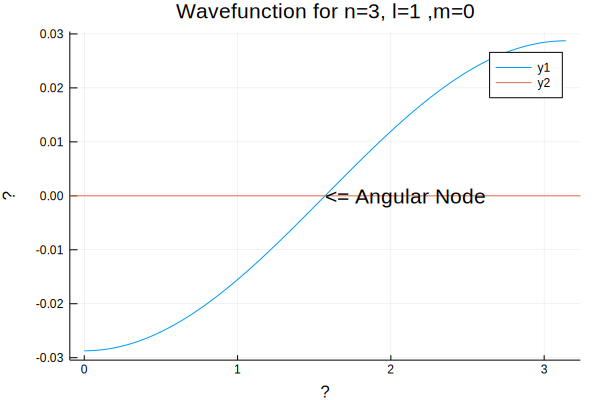

In [24]:
plot(θ,reshape(Ψ[50,:,1],100))
hline!([0])

plot!(xlabel="θ",
    ylabel="Ψ",
    title="Wavefunction for n=$n, l=$l ,m=$m")

annotate!(π/2,0,text("<= Angular Node",:left))

![Example n=2, l=1,m=0](../images/Orbitals/angular1d.png)

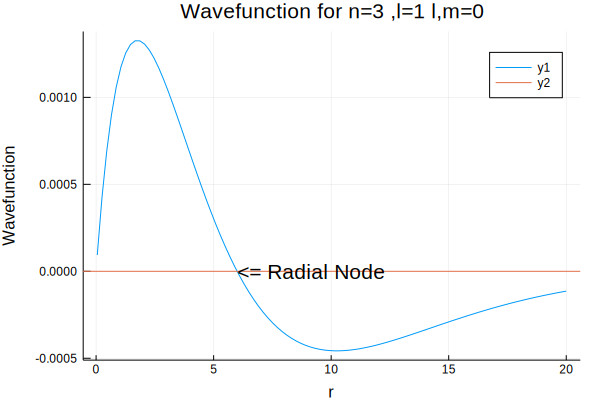

In [26]:
plot(r,reshape(Ψ[:,50,1],100))
hline!([0])

plot!(xlabel="r",
    ylabel="Wavefunction",
    title="Wavefunction for n=$n ,l=$l l,m=$m")

annotate!(6,0,text("<= Radial Node",:left))

![Radial plot for n=3,l=1, m=0](../images/Orbitals/radial1d.png)

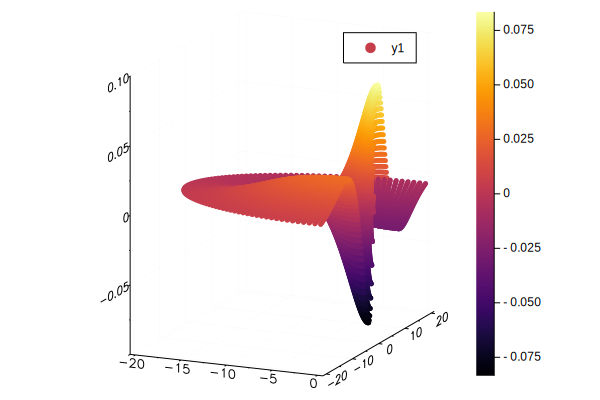

In [30]:
rap=ra[:,:,50]
θap=θa[:,:,50]
ϕap=ϕa[:,:,50]
Ψp=Ψ[:,:,50]

l=length(Ψp)

xp,yp,zp=SphtoCart(rap,θap,ϕap);

scatter(reshape(xp,l),reshape(zp,l),reshape(Ψp,l)
    ,markersize=3,marker_z=reshape(Ψp,l),markerstrokewidth=0)

In [36]:
#rap=squeeze(ra[:,:,50],3)
#θap=squeeze(θa[:,:,50],3)
#ϕap=squeeze(ϕa[:,:,50],3)
#Ψp=squeeze(Ψ[:,:,50],3)
rap=ra[:,:,50]
θap=θa[:,:,50]
ϕap=ϕa[:,:,50]
Ψp=Ψ[:,:,50]
xp,yp,zp=SphtoCart(rap,θap,ϕap);

scatter(xp,yp,markercolor=Ψp)

MethodError: MethodError: no method matching plot_color(::Float64)
Closest candidates are:
  plot_color(::Any, !Matched::Nothing) at /home/shaula/.julia/packages/PlotUtils/35TGG/src/colors.jl:15
  plot_color(::Any, !Matched::Number) at /home/shaula/.julia/packages/PlotUtils/35TGG/src/colors.jl:18
  plot_color(!Matched::Symbol) at /home/shaula/.julia/packages/PlotUtils/35TGG/src/colors.jl:6
  ...

In [31]:
#rap=squeeze(ra[:,:,50],3)
#θap=squeeze(θa[:,:,50],3)
#ϕap=squeeze(ϕa[:,:,50],3)
#Ψp=squeeze(Ψ[:,:,50],3)
rap=ra[:,:,50]
θap=θa[:,:,50]
ϕap=ϕa[:,:,50]
Ψp=Ψ[:,:,50]
xp,yp,zp=SphtoCart(rap,θap,ϕap);

xlabel("x")
ylabel("z")
title("ϕ-slice of Ψ for n=$n, l=$l, m=$m")
pcolor(xp[:,:],zp[:,:],Ψp[:,:],cmap="coolwarm")
colorbar()
savefig("angular2d2.png")

UndefVarError: UndefVarError: pygui not defined

![Example n=3, l=1,m=0](../images/Orbitals/angular2d.png)
![Example n=3, l=2,m=0](../images/Orbitals/angular2d2.png)

In order to make those awesome 3D images you always see in textbooks, checkout the second part to this series!
Happy Programming :)